In [56]:
import tensorflow as tf
import numpy as np

n_inputs = 28*28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

tf.reset_default_graph()

X=tf.placeholder(tf.float32, shape=(None, n_inputs), name = "X")
y=tf.placeholder(tf.int32, shape=(None), name="y")

In [57]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar("log_loss", loss)

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar("accuracy", accuracy)

In [58]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}".format(root_logdir, name)

In [59]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [60]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

logdir = log_dir("mnist_dnn")
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

m,n = X_train.shape

n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X:X_valid, y:y_valid})
        
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        
        if epoch % 100 == 0:
            print("Epoch:", epoch,
                "\tValidation accuracy: {:.3f}%".format(accuracy_val),
                 "\tLoss: {:.5f}".format(loss_val))

        if loss_val < best_loss:
            best_loss = loss_val
        else:
            epochs_without_progress += 1
            if epochs_without_progress > max_epochs_without_progress:
                print ("early stopping at epoch ", epoch)
                break

    accuracy_test = sess.run([accuracy], feed_dict={X:X_test, y:y_test})
    print("accuracy on test set is ", accuracy_test)


Epoch: 0 	Validation accuracy: 0.905% 	Loss: 0.36035
early stopping at epoch  97
accuracy on test set is  [0.9785]


In [1]:
------------------------

SyntaxError: invalid syntax (<ipython-input-1-8f81c231e55d>, line 1)

In [3]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print("X_train_full.shape ", X_train_full.shape, ",  dtype ", X_train_full.dtype)

4423680/4422102 [==============================] - 2s 0us/step
X_train_full.shape  (60000, 28, 28) ,  dtype  uint8


In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]]

'Coat'

In [65]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.layers

In [68]:
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [49]:
model.get_layer("dense_3") is hidden1

ValueError: No such layer: dense_3

In [70]:
weights, bias = model.layers[1].get_weights()
weights

array([[-0.05786104, -0.03718409,  0.05100201, ..., -0.03920323,
        -0.00355867, -0.02628182],
       [ 0.04866052, -0.03613958,  0.02728057, ..., -0.03329154,
        -0.0158131 ,  0.0062759 ],
       [-0.04214301, -0.02715234, -0.01072246, ..., -0.06680257,
        -0.01241786, -0.00183069],
       ...,
       [ 0.03678948, -0.00173537,  0.04764194, ..., -0.03512939,
         0.02514497, -0.0262302 ],
       [-0.05835123, -0.02459696, -0.02440459, ..., -0.00186773,
        -0.04175617,  0.03056435],
       [-0.01637167,  0.04510273,  0.00014251, ..., -0.02038236,
        -0.00708033, -0.05875852]], dtype=float32)

In [71]:
weights.shape

(784, 300)

In [73]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [74]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 3s 55us/sample - loss: 0.7213 - acc: 0.7630 - val_loss: 0.5108 - val_acc: 0.8284
Epoch 2/50
55000/55000 [==============================] - 3s 51us/sample - loss: 0.4897 - acc: 0.8294 - val_loss: 0.4382 - val_acc: 0.8512
Epoch 3/50
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4442 - acc: 0.8449 - val_loss: 0.4217 - val_acc: 0.8580
Epoch 4/50
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4176 - acc: 0.8519 - val_loss: 0.3990 - val_acc: 0.8676
Epoch 5/50
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3971 - acc: 0.8603 - val_loss: 0.3974 - val_acc: 0.8640
Epoch 6/50
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3808 - acc: 0.8654 - val_loss: 0.3906 - val_acc: 0.8662
Epoch 7/50
55000/55000 [==============================] - 3s 60us/sample - loss: 0.3687 - acc: 0.8704 - val_loss: 0.3

In [55]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': None,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

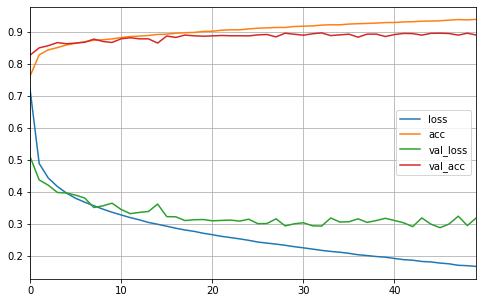

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [76]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 64.9485 - acc: 0.8520


[64.94854828796387, 0.852]

In [78]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [80]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

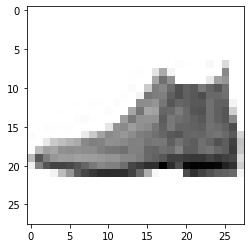

In [85]:
plt.imshow(X_test[0], cmap="binary")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________
Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 90us/sample - loss: 1.6241 - val_loss: 0.8796
Epoch 2/30
11610/11610 [==============================] - 1s 76us/sample - loss: 0.7827 - val_loss: 0.8106
Epoch 3/30
11610/11610 [==============================] - 1s 75us/sample - loss: 0.7303 - val_loss: 0.7687
Epoch 4/30
116

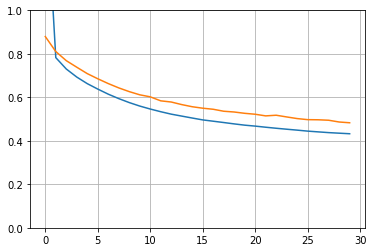

prediction:  [[1.6802197]
 [2.864891 ]]
original:  [1.632 1.76 ]


In [63]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


housing = fetch_california_housing()

X_train_valid, X_test, y_train_valid, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(1))

model.compile(loss = "mean_squared_error", optimizer=keras.optimizers.SGD(lr=0.001))

model.summary()

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

plt.plot(pd.DataFrame(history.history))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

X_new = X_test[1:3]
y_pred = model.predict(X_new)
print("prediction: ", y_pred)
print("original: ", y_test[1:3])


In [61]:
# --- Functional API

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

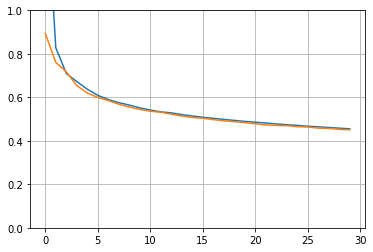

prediction:  [[1.2857757]
 [1.4058375]]
original:  [1.003 1.548]


In [70]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


housing = fetch_california_housing()

X_train_valid, X_test, y_train_valid, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

keras.backend.clear_session()

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss = "mean_squared_error", optimizer=keras.optimizers.SGD(lr=0.001))

model.summary()

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

plt.plot(pd.DataFrame(history.history))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

X_new = X_test[1:3]
y_pred = model.predict(X_new)
print("prediction: ", y_pred)
print("original: ", y_test[1:3])


In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

root_logdir = os.path.join(os.curdir, "keras_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/trian: {:.2f}".format(logs["val_loss"] / logs["loss"]))

housing = fetch_california_housing()

X_train_valid, X_test, y_train_valid, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]


keras.backend.clear_session()

inputA = keras.layers.Input(shape=X_train_A.shape[1:])
inputB = keras.layers.Input(shape=X_train_B.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(inputB)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([inputA, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[inputA, inputB], outputs=[output])

model.compile(loss = "mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=0.001))

model.summary()


history = model.fit((X_train_A, X_train_B), 
                    y_train, 
                    epochs=30, 
                    validation_data=((X_valid_A, X_valid_B), y_valid),
                    callbacks=[PrintValTrainRatioCallback(), keras.callbacks.TensorBoard(get_run_logdir())])
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

plt.plot(pd.DataFrame(history.history))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

X_new = X_test[1:3]
y_pred = model.predict((X_new[:, :5], X_new[:, 2:]))
print("prediction: ", y_pred)
print("original: ", y_test[1:3])


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

<Figure size 640x480 with 1 Axes>

prediction:  [[1.7951436]
 [2.541521 ]]
original:  [1.35 2.6 ]


In [5]:
import numpy as np 
import tensorflow as tf

test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)
#         writer.flush()


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0
